# Import Libraries

In [ ]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd # DataFrame
from pathlib import Path
from sklearn.model_selection import train_test_split
from google.colab import files
from pathlib import Path  # File managment




## Load the Data

In order to address this classification problem we first need to create our dataset. In this section you will load the data from 2 different datasets and combine them into data for training and testing

The first dataset contains the covid 19 part of the data

The second dataset contians more then needed for this exercise, we will only use the healthy expamples (appears as Normal in the dataset) and those of the Bacterial subcatagory of Pneumonia  

### Load COVID-19 chest X-Ray

Clone COVID-19 X-Ray dataset repository

https://github.com/ieee8023/covid-chestxray-dataset

The data consists of X-ray images of pneumonia cases gathered from different sources.

Please refer to the link to read about the given data.
Additional info can be found in the dataset paper :
https://arxiv.org/abs/2003.11597


In [ ]:
#We can use "!" to run bash commands in google colab
#The following command will download the latest available data from the git repository
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

fatal: destination path 'covid-chestxray-dataset' already exists and is not an empty directory.


Set images and metadata files path and examine data

In [ ]:
covid_images_path = Path("covid-chestxray-dataset/images")
covid_metadata_path = Path("covid-chestxray-dataset/metadata.csv")

We use pandas to convert the metadata CSV to a dataframe object.

If you are unfamiliar with pandas please refer to:

https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

In [ ]:
covid_metadata = pd.read_csv(covid_metadata_path)

A look at the metadata:

You can read the paper for description of the data contents.

In [ ]:
covid_metadata.head(10)

patientid  offset  sex   age                   finding RT_PCR_positive  \
0         2     0.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
1         2     3.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
2         2     5.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
3         2     6.0    M  65.0  Pneumonia/Viral/COVID-19               Y   
4         4     0.0    F  52.0  Pneumonia/Viral/COVID-19               Y   
5         4     5.0    F  52.0  Pneumonia/Viral/COVID-19               Y   
6         5     NaN  NaN   NaN                 Pneumonia             NaN   
7         6     0.0  NaN   NaN  Pneumonia/Viral/COVID-19               Y   
8         6     4.0  NaN   NaN  Pneumonia/Viral/COVID-19               Y   
9         3     4.0    M  74.0      Pneumonia/Viral/SARS             NaN   

  survival intubated intubation_present went_icu  ...              date  \
0        Y         N                  N        N  ...  January 22, 2020   
1        Y         N                  N        N  ...  January 25, 2020   
2        Y         N                  N        N  ...  January 27, 2020   
3        Y         N                  N        N  ...  January 28, 2020   
4      NaN         N                  N        N  ...  January 25, 2020   
5      NaN         N                  N        N  ...  January 30, 2020   
6      NaN         Y                  Y        Y  ...              2017   
7      NaN         Y                  Y        Y  ...   January 6, 2020   
8      NaN         Y                  Y        Y  ...  January 10, 2020   
9        N       NaN                NaN      NaN  ...              2004   

                                            location  folder  \
0        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3        Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
4  Changhua Christian Hospital, Changhua City, Ta...  images   
5  Changhua Christian Hospital, Changhua City, Ta...  images   
6                                                NaN  images   
7  Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...  images   
8  Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...  images   
9     Mount Sinai Hospital, Toronto, Ontario, Canada  images   

                                            filename  \
0  auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...   
1  auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...   
2  auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...   
3  auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...   
4                              nejmc2001573_f1a.jpeg   
5                              nejmc2001573_f1b.jpeg   
6                                     ARDSSevere.png   
7                                  lancet-case2a.jpg   
8                                  lancet-case2b.jpg   
9  SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....   

                             doi  \
0           10.1056/nejmc2001272   
1           10.1056/nejmc2001272   
2           10.1056/nejmc2001272   
3           10.1056/nejmc2001272   
4           10.1056/NEJMc2001573   
5           10.1056/NEJMc2001573   
6                            NaN   
7  10.1016/S0140-6736(20)30211-7   
8  10.1016/S0140-6736(20)30211-7   
9           10.1148/rg.242035193   

                                                 url   license  \
0  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
1  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
2  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
3  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
4  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
5  https://www.nejm.org/doi/full/10.1056/NEJMc200...       NaN   
6  https://en.wikipedia.org/wiki/File:ARDSSevere.png  CC BY-SA   
7  https://www.thelancet.com/journals/lancet/arti...       NaN   
8  https://www.thelancet.c

In [ ]:
#List the images
list(covid_images_path.glob("*"))[0:10]

[PosixPath('covid-chestxray-dataset/images/11547_2020_1202_Fig1_HTML-b.png'),
 PosixPath('covid-chestxray-dataset/images/7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg'),
 PosixPath('covid-chestxray-dataset/images/f46a9bfc7222e61e099a25ab9267da_jumbo.jpeg'),
 PosixPath('covid-chestxray-dataset/images/b9673e89.jpg'),
 PosixPath('covid-chestxray-dataset/images/d84789f9ece74ea65e7ec2c4faaaf3_jumbo.jpeg'),
 PosixPath('covid-chestxray-dataset/images/covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-day-2.jpg'),
 PosixPath('covid-chestxray-dataset/images/16745_2_2.PNG'),
 PosixPath('covid-chestxray-dataset/images/4fed5061.jpg'),
 PosixPath('covid-chestxray-dataset/images/5A78BCA9-5B7A-440D-8A4E-AE7710EA6EAD.jpeg'),
 PosixPath('covid-chestxray-dataset/images/11547_2020_1200_Fig3_HTML-a.png')]

Visualize some cases

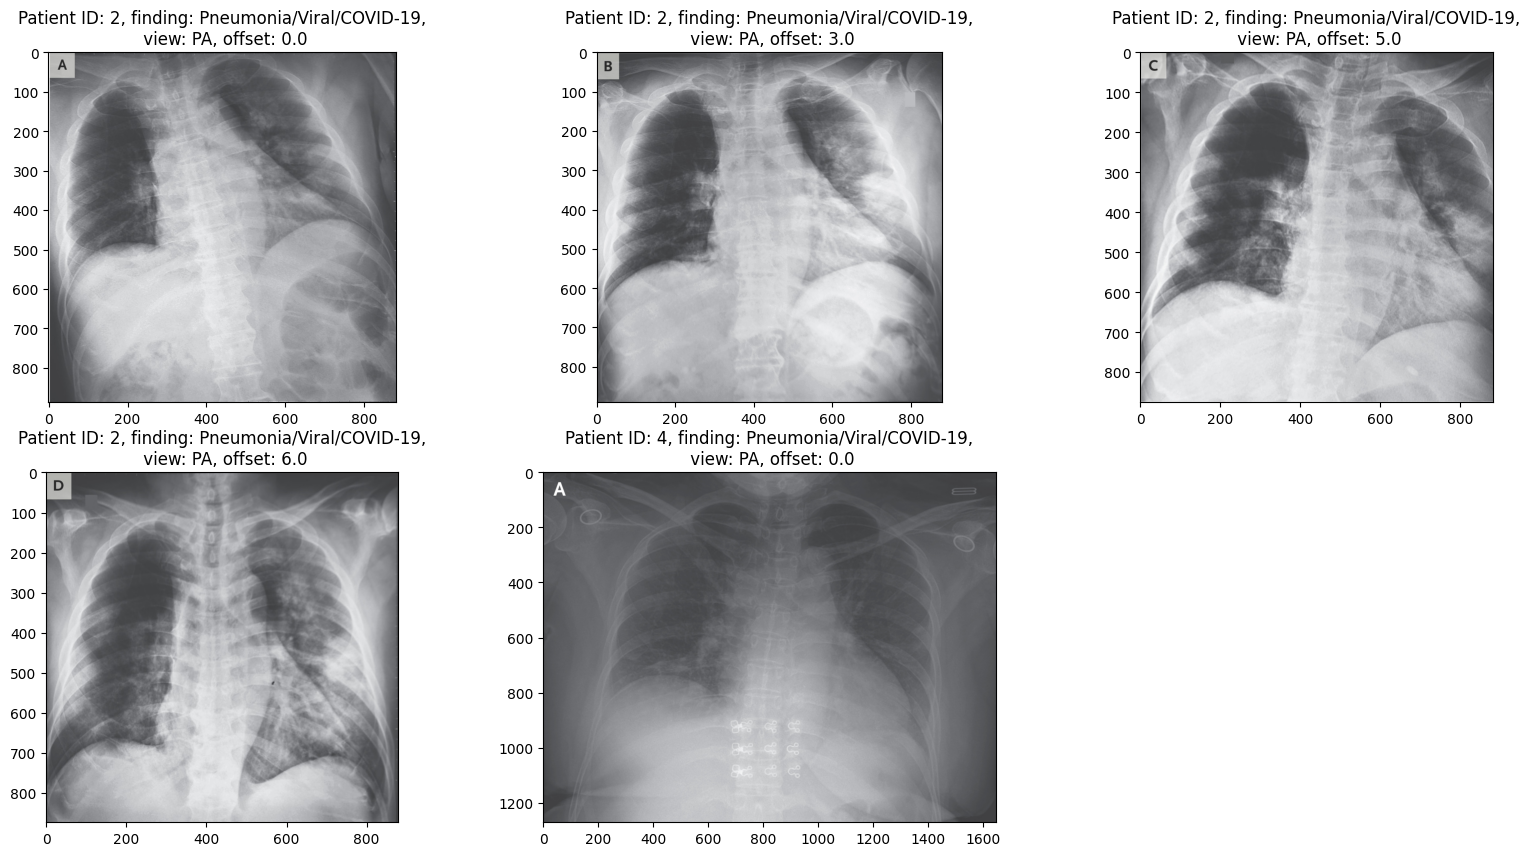

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
for index, case in covid_metadata.head(5).iterrows():
  plt.subplot(2,3,index+1)
  image_path = covid_images_path / case["filename"]
  # plt.figure()
  plt.title("Patient ID: {0}, finding: {1},\n view: {2}, offset: {3}".format(case["patientid"],case["finding"],case["view"],case["offset"]))
  plt.imshow(plt.imread(image_path),cmap='gray')
plt.show()

#### Filter Covid-19 Dataset
Write your own code to filter the metadata dataframe to contain only posteroanterior - "PA" (back-to-front) views.

Return a dataframe that contains finding/full filepath as in the following figure:
<table>
  <tr>
    <th></th>
    <th>finding</th>
    <th>filepath</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>some/file/path</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Pneumonia/Viral/COVID-19</td>
    <td>another/file/path</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pneumonia/Viral/SARS</td>
    <td>some/other/file/path</td>
  </tr>
    <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

**Explain:**
**Filtering the data to get PA only!**

In [ ]:
# Filter only PA (posteroanterior) view cases
covid_pa_metadata = covid_metadata[covid_metadata["view"] == "PA"]

# Create a dataframe with finding and full file path
covid_filtered_df = covid_pa_metadata[["finding", "filename"]].copy()
covid_filtered_df["filepath"] = covid_filtered_df["filename"].apply(lambda x: str(covid_images_path / x))
covid_filtered_df.drop(columns=["filename"], inplace=True)

# Display the filtered dataframe
covid_filtered_df.head()


finding                                           filepath
0  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-a-20...
1  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-b-20...
2  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-c-20...
3  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-d-20...
4  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/nejmc2001573_f1...

Filter your dataframe so it contains only COVID-19 cases:

In [ ]:
# Filter only COVID-19 cases
covid_only_df = covid_filtered_df[covid_filtered_df["finding"] == "Pneumonia/Viral/COVID-19"]

# Display the filtered dataframe
covid_only_df.head()


finding                                           filepath
0  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-a-20...
1  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-b-20...
2  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-c-20...
3  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/auntminnie-d-20...
4  Pneumonia/Viral/COVID-19  covid-chestxray-dataset/images/nejmc2001573_f1...

#### Train Test Split
split the data into train and test data, and explain your method (inclouding pros and cons)

**הסבר**

**חלוקה של הדאטא לאימון וטסט עם אותו סיד בכל פעם**

In [ ]:

# Split data into 80% training and 20% testing
train_df_cov, test_df_cov = train_test_split(covid_only_df, test_size=0.2, random_state=42, stratify=covid_only_df["finding"])

# Display the split datasets
print("Training set size:", len(train_df_cov))
print("Testing set size:", len(test_df_cov))


Training set size: 156
Testing set size: 40


Pros:

    Ensures Generalization – By keeping a separate test set, we can evaluate the model on unseen data.
    Stratified Sampling (stratify argument) – Ensures the same proportion of COVID-19 cases in both training and test sets.
    Reproducibility (random_state=42) – The same split will be generated every time the code runs.

Cons:

    Small Dataset Risk – If the dataset is small, a single train-test split may not be representative, and performance can vary significantly.
    Not Suitable for Evolving Data – If more data is added, the split has to be recalculated.
    No Validation Set – This split does not include a validation set, which is crucial for tuning hyperparameters.

### Load Pneumonia and Normal chest X-Ray

This dataset contains 5,856 validated Chest X-Ray images. The images are split into a training set and a testing set of independent patients. Images are labeled as (disease:NORMAL/BACTERIA/VIRUS)-(randomized patient ID)-(image number of a patient).


For more information [chest X-Ray](https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images)

##### Installing the [Kaggle API](https://github.com/Kaggle/kaggle-api) in Colab

In [ ]:
!pip install kaggle

##### Authenticating with Kaggle using kaggle.json

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below to upload kaggle.json to your Colab runtime.

In [ ]:

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


##### Using the Kaggle API

For a more complete list of what you can do with the API, visit https://github.com/Kaggle/kaggle-api.

##### Downloading Pneumonia and Normal chest X-Ray dataset

In [ ]:
#!kaggle datasets download "tolgadincer/labeled-chest-xray-images"

In [ ]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images --force
###### added doe to "found more recently modified local copy (use --force to force download)"

Dataset URL: https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images
License(s): other
100% 1.17G/1.17G [00:58<00:00, 20.6MB/s]
100% 1.17G/1.17G [00:58<00:00, 21.6MB/s]


In [ ]:
!unzip -o labeled-chest-xray-images.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-00

In [ ]:
!ls chest_xray
!ls chest_xray/train
!ls chest_xray/test


test  train
NORMAL	PNEUMONIA
NORMAL	PNEUMONIA


##### Create Train and Test DataFrames
Create Train and Test DataFrames for the NORMAL/BACTERIA catagories using Pandas Dataframe (from the Pneumonia catgory take only the bacteria subcatagory and filter out the anything else from this catgory). Be sure it is of the same format of the covid 19 dataframe:
<table>
  <tr>
    <th></th>
    <th>finding</th>
    <th>filepath</th>
  </tr>
  <tr>
    <td>0</td>
    <td>NORMAL</td>
    <td>some/file/path</td>
  </tr>
  <tr>
    <td>1</td>
    <td>BACTERIA</td>
    <td>another/file/path</td>
  </tr>
    <tr>
    <td>2</td>
    <td>NORMAL</td>
    <td>some/other/file/path</td>
  </tr>
    <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
       <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
        <tr>
    <td>...</td>
    <td>...</td>
    <td>...</td>
  </tr>
</table>

**יצירה של סיווג ונתיב הקובץ לכל תמונה**


In [ ]:
# Defining paths to the directories containing training and test images
train_dir = Path("chest_xray/train")  # Path to training directory
test_dir = Path("chest_xray/test")  # Path to test directory

# Creating DataFrame
def create_dataframe(data_dir, normal_folder, pneumonia_folder):
    data = []  # List to store data

    # Processing (NORMAL) images
    normal_path = data_dir / normal_folder  # Creating path to the normal images folder
    for img_name in os.listdir(normal_path):  # Iterating all files in folder
        img_path = normal_path / img_name  # Creating full file path
        data.append(["NORMAL", str(img_path)])  # Adding data to list

    # Processing (PNEUMONIA) images – only (BACTERIAL)
    pneumonia_path = data_dir / pneumonia_folder  # Creating path to the pneumonia images folder
    for img_name in os.listdir(pneumonia_path):  # Iterating through all files in folder
        if "bacteria" in img_name.lower():  # Checking that image belongs to bacterial pneumonia only
            img_path = pneumonia_path / img_name  # Creating full file path
            data.append(["BACTERIA", str(img_path)])  # Adding data to list

    # Creating a DataFrame with two columns: finding (type of diagnosis) and filepath (image path)
    return pd.DataFrame(data, columns=["finding", "filepath"])

# Creating DataFrame for training and test data
train_df = create_dataframe(train_dir, "NORMAL", "PNEUMONIA")  # Creating DataFrame for training
test_df = create_dataframe(test_dir, "NORMAL", "PNEUMONIA")  # Creating DataFrame for testing

# Displaying the first five rows of each DataFrame to verify that data is loaded correctly
print("Train DataFrame:")
print(train_df.head())

print("\nTest DataFrame:")
print(test_df.head())



Train DataFrame:
  finding                                          filepath
0  NORMAL  chest_xray/train/NORMAL/NORMAL-6511522-0001.jpeg
1  NORMAL  chest_xray/train/NORMAL/NORMAL-4092650-0002.jpeg
2  NORMAL  chest_xray/train/NORMAL/NORMAL-5049026-0001.jpeg
3  NORMAL  chest_xray/train/NORMAL/NORMAL-9125455-0001.jpeg
4  NORMAL  chest_xray/train/NORMAL/NORMAL-3514363-0002.jpeg

Test DataFrame:
  finding                                         filepath
0  NORMAL  chest_xray/test/NORMAL/NORMAL-3937418-0001.jpeg
1  NORMAL  chest_xray/test/NORMAL/NORMAL-5538803-0001.jpeg
2  NORMAL  chest_xray/test/NORMAL/NORMAL-2924895-0001.jpeg
3  NORMAL  chest_xray/test/NORMAL/NORMAL-3322209-0001.jpeg
4  NORMAL  chest_xray/test/NORMAL/NORMAL-7225301-0001.jpeg


## Create a full dataset





**משרשר את כל הדאטא ל2 חתיכות - אימון וטסט**

In [ ]:
# Concatenate the COVID-19, NORMAL, and BACTERIA DataFrames train_df_cov, test_df_cov
full_train_df = pd.concat([train_df, train_df_cov], ignore_index=True)
full_test_df = pd.concat([test_df, test_df_cov], ignore_index=True)

# Display the combined datasets
print("Full Training Dataset Size:", len(full_train_df))
print("Full Testing Dataset Size:", len(full_test_df))

# Display the first few rows
print("\nFull Train DataFrame:")
print(full_train_df.head())

print("\nFull Test DataFrame:")
print(full_test_df.head())


Full Training Dataset Size: 4043
Full Testing Dataset Size: 516

Full Train DataFrame:
  finding                                          filepath
0  NORMAL  chest_xray/train/NORMAL/NORMAL-6511522-0001.jpeg
1  NORMAL  chest_xray/train/NORMAL/NORMAL-4092650-0002.jpeg
2  NORMAL  chest_xray/train/NORMAL/NORMAL-5049026-0001.jpeg
3  NORMAL  chest_xray/train/NORMAL/NORMAL-9125455-0001.jpeg
4  NORMAL  chest_xray/train/NORMAL/NORMAL-3514363-0002.jpeg

Full Test DataFrame:
  finding                                         filepath
0  NORMAL  chest_xray/test/NORMAL/NORMAL-3937418-0001.jpeg
1  NORMAL  chest_xray/test/NORMAL/NORMAL-5538803-0001.jpeg
2  NORMAL  chest_xray/test/NORMAL/NORMAL-2924895-0001.jpeg
3  NORMAL  chest_xray/test/NORMAL/NORMAL-3322209-0001.jpeg
4  NORMAL  chest_xray/test/NORMAL/NORMAL-7225301-0001.jpeg


For each dataframe convert findings from string to numeric classes, using the following dictionary:

ממירים את סוג הממצא לערך מספרי לנוחות . ללא מחלה = 0 , בקטריה = 1, קורונה = 2
זה גם מהיר יותר לאימון ויותר מתאים.

In [ ]:
finding_to_label = {'NORMAL':0,
 'BACTERIA':1,
 'Pneumonia/Viral/COVID-19':2}
label_to_finding = {v: k for k, v in finding_to_label.items()}
### Fill in your code



# Define mapping dictionaries
finding_to_label = {'NORMAL': 0, 'BACTERIA': 1, 'Pneumonia/Viral/COVID-19': 2}
label_to_finding = {v: k for k, v in finding_to_label.items()}

# Apply the mapping to the dataframes
full_train_df["label"] = full_train_df["finding"].map(finding_to_label)
full_test_df["label"] = full_test_df["finding"].map(finding_to_label)

# Drop the original 'finding' column (optional, if not needed)
full_train_df.drop(columns=["finding"], inplace=True)
full_test_df.drop(columns=["finding"], inplace=True)

# Display the first few rows of the updated DataFrames
print("Full Train DataFrame with Labels:")
print(full_train_df.head())

print("\nFull Test DataFrame with Labels:")
print(full_test_df.head())


Full Train DataFrame with Labels:
                                           filepath  label
0  chest_xray/train/NORMAL/NORMAL-6511522-0001.jpeg      0
1  chest_xray/train/NORMAL/NORMAL-4092650-0002.jpeg      0
2  chest_xray/train/NORMAL/NORMAL-5049026-0001.jpeg      0
3  chest_xray/train/NORMAL/NORMAL-9125455-0001.jpeg      0
4  chest_xray/train/NORMAL/NORMAL-3514363-0002.jpeg      0

Full Test DataFrame with Labels:
                                          filepath  label
0  chest_xray/test/NORMAL/NORMAL-3937418-0001.jpeg      0
1  chest_xray/test/NORMAL/NORMAL-5538803-0001.jpeg      0
2  chest_xray/test/NORMAL/NORMAL-2924895-0001.jpeg      0
3  chest_xray/test/NORMAL/NORMAL-3322209-0001.jpeg      0
4  chest_xray/test/NORMAL/NORMAL-7225301-0001.jpeg      0


## Exlpore the data

### Show Data Statistics
Plot a histogram of the data and explain your results

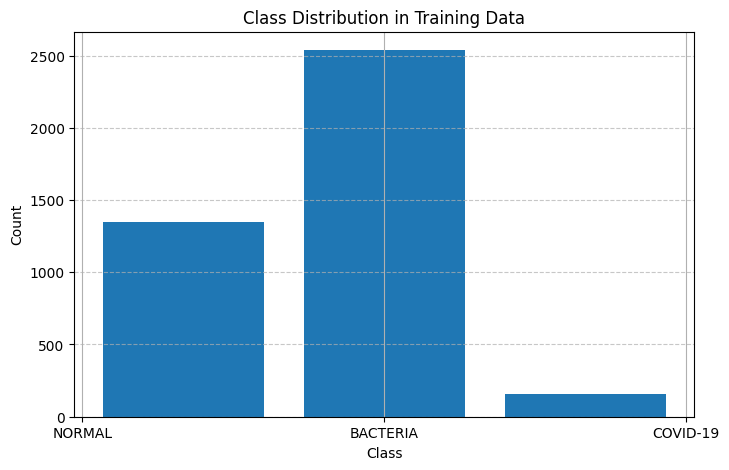

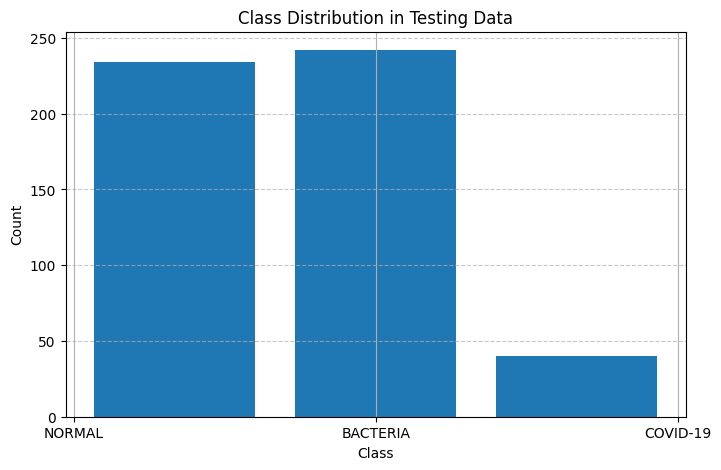

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for training dataset
plt.figure(figsize=(8, 5))
full_train_df["label"].hist(bins=3, rwidth=0.8, align='mid')
plt.xticks([0, 1, 2], ["NORMAL", "BACTERIA", "COVID-19"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for testing dataset
plt.figure(figsize=(8, 5))
full_test_df["label"].hist(bins=3, rwidth=0.8, align='mid')
plt.xticks([0, 1, 2], ["NORMAL", "BACTERIA", "COVID-19"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Testing Data")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Fill your answers here:**



### Explore the images
Show some example images from each catagory and explain biases or corruptions in the images.

explain how to avoid those biases and corruptions

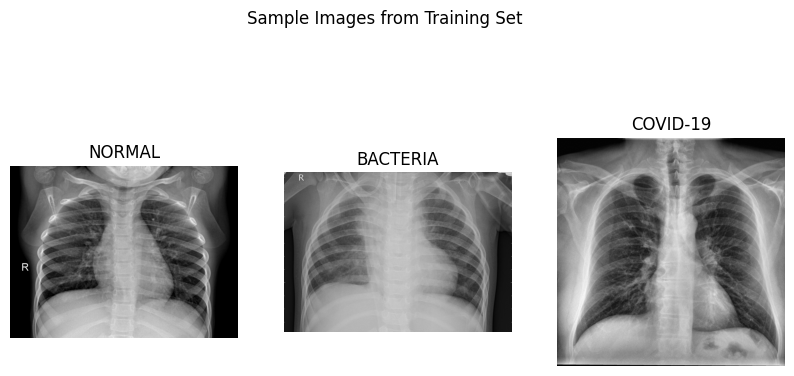

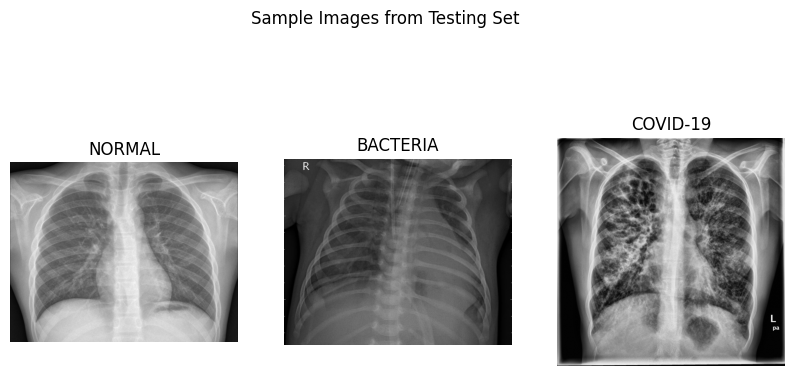

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display images from each category
def show_sample_images(df, title):
    categories = {0: "NORMAL", 1: "BACTERIA", 2: "COVID-19"}

    plt.figure(figsize=(10, 5))

    for label, category in categories.items():
        category_df = df[df["label"] == label]

        if not category_df.empty:  # Check if there are any images for this category
            sample = category_df.sample(1).iloc[0]
            img = mpimg.imread(sample["filepath"])

            plt.subplot(1, 3, label + 1)
            plt.imshow(img, cmap="gray")
            plt.title(f"{category}")
            plt.axis("off")
        else:
            print(f"Warning: No images found for category {category}")

    plt.suptitle(title)
    plt.show()

# Show images from training set
show_sample_images(full_train_df, "Sample Images from Training Set")

# Show images from testing set
show_sample_images(full_test_df, "Sample Images from Testing Set")


**Fill your answers here:**



# Dealing with imbalanced data
There are many methods to try and overcome this problem, we will try 3 methods , all methods will be preformed solely on the train data:

*  **Under sampling:** Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class.

*  **Over sampling:** Over-sampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples

* **Class weights:** Class weights tries to balance the data without changing the data itself. This can be achieved by giving different weights to both the majority and minority classes, by integrating the weights as part of the loss function. The difference in weights will influence the classification of the classes during the training phase, that if a miss classification happens on a rare class, the loss will be higher than a common class.







## Use the 3 diifferent methods in your training

Create an over sampled train set and a under sampled train set.

יש שלושה דרכים להתמודד עם חוסר איזון בהתפלגות הדאטא -
* שימוש במשקולות כדי לתת לדאטא עם מעט דגימות יותר משקל
* דגימת יתר של הדאטא שיש ממנה פחות
* דגימה מופחתת של הדאטא המרובה


Under-Sampled Training Data Distribution:
label
0    156
1    156
2    156
Name: count, dtype: int64

Over-Sampled Training Data Distribution:
label
0    1349
1    1349
2    1349
Name: count, dtype: int64


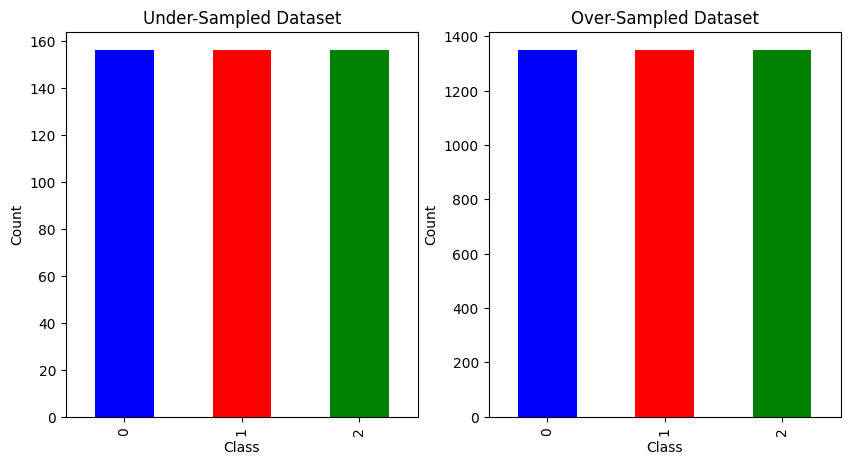

In [ ]:
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt

# Ensure full_train_df exists before proceeding
if 'full_train_df' in globals():
    # Separate majority and minority classes
    df_normal = full_train_df[full_train_df["label"] == 0]
    df_bacteria = full_train_df[full_train_df["label"] == 1]
    df_covid = full_train_df[full_train_df["label"] == 2]

    # Get how many samples in each class
    n_covid = len(df_covid)
    n_bacteria = len(df_bacteria)
    n_normal = len(df_normal)
    # Check if COVID-19 samples exist before resampling

    # Under-sampling: Reduce the size of the majority class to match the minority class (COVID-19)
    df_normal_under = resample(df_normal, replace=False, n_samples=n_covid, random_state=42) if n_normal > n_covid else df_normal
    df_bacteria_under = resample(df_bacteria, replace=False, n_samples=n_covid, random_state=42) if n_bacteria > n_covid else df_bacteria

    # Combine to form the under-sampled dataset
    train_under_sampled = pd.concat([df_normal_under, df_bacteria_under, df_covid], ignore_index=True)

    # Over-sampling: Increase the size of the minority class to match the majority class (NORMAL)
    df_covid_over = resample(df_covid, replace=True, n_samples=n_normal, random_state=42) if n_covid > 0 else df_covid
    df_bacteria_over = resample(df_bacteria, replace=True, n_samples=n_normal, random_state=42) if n_bacteria > 0 else df_bacteria

    # Combine to form the over-sampled dataset
    train_over_sampled = pd.concat([df_normal, df_bacteria_over, df_covid_over], ignore_index=True)

    # Display class distributions using Pandas
    print("\nUnder-Sampled Training Data Distribution:")
    print(train_under_sampled["label"].value_counts())

    print("\nOver-Sampled Training Data Distribution:")
    print(train_over_sampled["label"].value_counts())

        # Plot class distributions
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    train_under_sampled["label"].value_counts().plot(kind="bar", color=["blue", "red", "green"])
    plt.title("Under-Sampled Dataset")
    plt.xlabel("Class")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    train_over_sampled["label"].value_counts().plot(kind="bar", color=["blue", "red", "green"])
    plt.title("Over-Sampled Dataset")
    plt.xlabel("Class")
    plt.ylabel("Count")

    plt.show()


creat your class weights, explain your choise and how it affects your results

In [ ]:
###class_weights = []

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Ensure full_train_df exists before computing class weights
if 'full_train_df' in globals():
    # Extract labels from the training dataset
    labels = full_train_df["label"].values

    # Compute class weights using inverse frequency method
    class_labels = np.unique(labels)
    class_weights_values = compute_class_weight(class_weight="balanced", classes=class_labels, y=labels)

    # Convert class weights to dictionary format for TensorFlow usage
    class_weights = {class_labels[i]: class_weights_values[i] for i in range(len(class_labels))}

    # Display the computed class weights
    print("Computed Class Weights:", class_weights)

else:
    print("Error: full_train_df is not defined. Please ensure the dataset is properly loaded before computing class weights.")


Computed Class Weights: {0: 0.9990116135408945, 1: 0.5309955345416338, 2: 8.63888888888889}


# Create tf.Dataset
Create a tf.Dataset object from the train data, in which every entry has the label and the image.
Repeat for validation data.

Steps:
1.   Create a tf.dataset object from the dataframe. [1]
2.   Write a function that parse the data from each dataset entry to class/image [2]
3.   Apply the function on the dataset using tf.Dataset.map [2]

See:

[1] tf.dataset from pandas dataframe : https://www.tensorflow.org/tutorials/load_data/pandas_dataframe#load_data_using_tfdatadataset
[2] Image loading : https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata

* **Step 1 - Create a tf.dataset object from the dataframe, each entry should contain filename and class.**

 creates **TensorFlow datasets from Pandas DataFrames** (full_train_df and full_test_df).
It converts file paths and labels into TensorFlow tensors (tf.constant) to ensure compatibility with TensorFlow operations.
Then, it creates tf.data.Dataset objects (train_ds for training and val_ds for validation) using from_tensor_slices().
Finally, it prints a success message if the datasets are created, or an error message if the DataFrames are missing.

**יצירה של אובייקט מהנתוני אימון וטסט, כך שכל אובייקט מכיל נתיב לקובץ ותווית מספרית. האובייקט נוצר כדי להתאים לטנצור פלו.**

In [ ]:
##train_ds = ### Fill in your code

In [ ]:

# Ensure full_train_df and full_test_df exist
if 'full_train_df' in globals() and 'full_test_df' in globals():
    # Convert filenames explicitly to string
    train_filenames = tf.constant(full_train_df["filepath"].values, dtype=tf.string)
    train_labels = tf.constant(full_train_df["label"].values, dtype=tf.int32)

    val_filenames = tf.constant(full_test_df["filepath"].values, dtype=tf.string)
    val_labels = tf.constant(full_test_df["label"].values, dtype=tf.int32)

    # Create TensorFlow datasets
    train_ds = tf.data.Dataset.from_tensor_slices((train_filenames, train_labels))
    val_ds = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))

    print("Datasets created successfully.")
else:
    print("Error: Ensure full_train_df and full_test_df exist before proceeding.")


Datasets created successfully.


In [ ]:
train_size = len(full_train_df)
val_size = len(full_test_df)

print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")


Training set size: 4043
Validation set size: 516


  Test your dataset object:

In [ ]:
for filename, label in train_ds.take(5):
  print ('Filename: {}, Label: {}'.format(filename, label))




Filename: b'chest_xray/train/NORMAL/NORMAL-6511522-0001.jpeg', Label: 0
Filename: b'chest_xray/train/NORMAL/NORMAL-4092650-0002.jpeg', Label: 0
Filename: b'chest_xray/train/NORMAL/NORMAL-5049026-0001.jpeg', Label: 0
Filename: b'chest_xray/train/NORMAL/NORMAL-9125455-0001.jpeg', Label: 0
Filename: b'chest_xray/train/NORMAL/NORMAL-3514363-0002.jpeg', Label: 0


* **Step 2 - Write a function to parse the image file name and return a grayscale image , resized to 512X512**.

> The mapping function will run each time a batch is fetched. the input is your dataset entry - (filepath,label) and the output should be (img,label).
\
Note that once the you read the image using tensorflow (tf.io.read_file), your operations should be on Tensors.

> You can use a mapping function to tranform the data randomly each time a batch is fetched for data augmentation.
https://www.tensorflow.org/tutorials/images/data_augmentation


**מתבצע עיבוד מקדים לתמונות. המרה לשחור לבן וגודל מתאים, נרמול. זה מתבצע בזמן תהליך האימון ולא לפני, מה שמאפשר לנו לעבד תמונות תוך כדי האימון במקום לשמור את כל תמונות לפני האימון ולתפוס הרבה אחסון. מייעל את העבודה בכמות גדולה של דאטא**

In [ ]:
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=1)  # Convert to grayscale
    img = tf.image.resize(img, [512, 512])  # Reduce image size (was 512x512)
    img = img / 255.0  # Normalize pixel values
    return img

def map_function(filename, label):
    filename = tf.cast(filename, tf.string)  # Ensure filename is a string
    img = tf.io.read_file(filename)  # Read the image file
    img = decode_img(img)  # Decode and preprocess the image
    return img, label



In [ ]:
### Student code
##def decode_img(img):
  ### Fill in your code

##def map_function(filename,label):
  ### Fill in your code



* Step 3 - Apply the mapping function on the dataset

In [ ]:
train_ds = train_ds.map(map_function)
val_ds = val_ds.map(map_function)

# Test the mapped dataset
for img, label in train_ds.take(1):
    print("Mapped Image shape:", img.shape, "Label:", label.numpy())


Mapped Image shape: (512, 512, 1) Label: 0


Test your dataset:

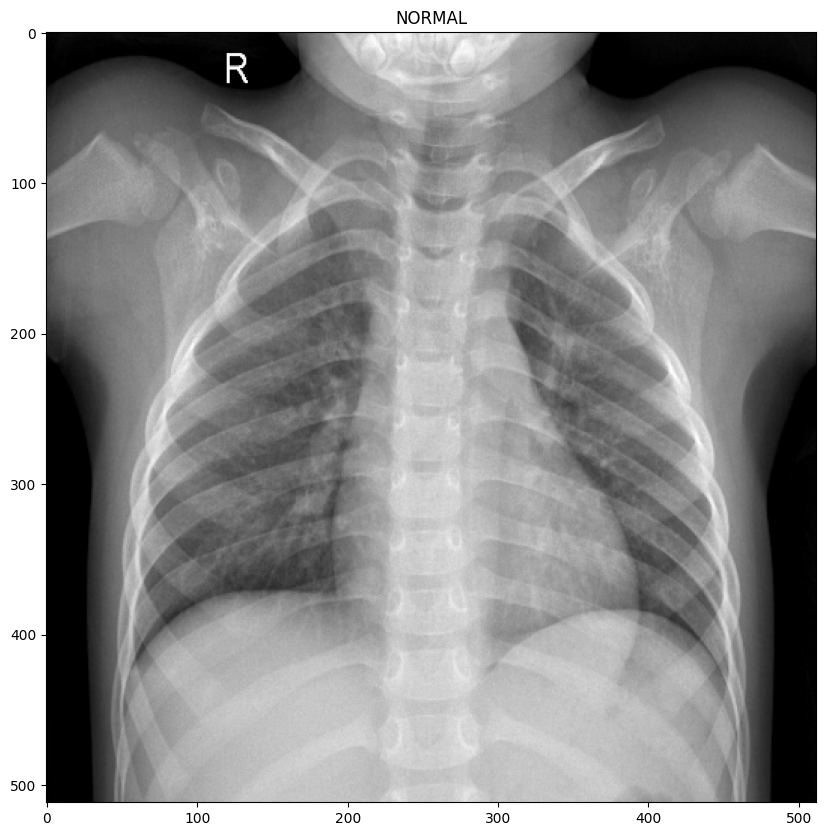

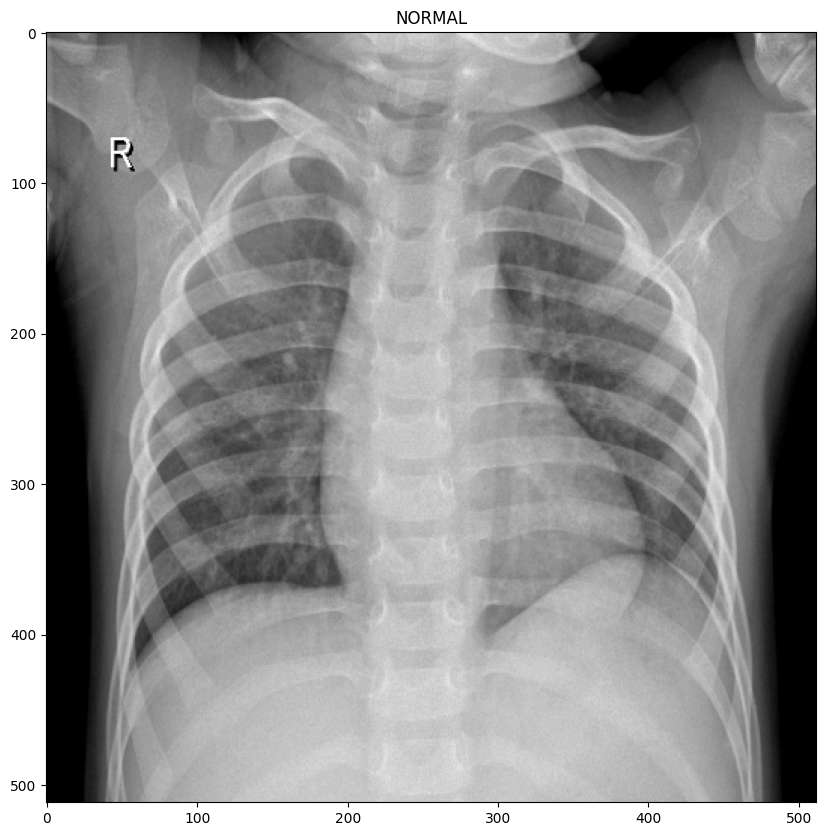

In [ ]:
for image, label in train_ds.take(2):
  plt.figure()
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.title(label_to_finding[label.numpy()])
plt.show()

Repeat the steps for the validation set.

In [ ]:
# Ensure full_test_df exists
if 'full_train_df' in globals():
    full_test_df = full_train_df.sample(frac=0.2, random_state=42)  # Example: Create a test set from train set
    full_train_df = full_train_df.drop(full_test_df.index)  # Remove test data from train set
import tensorflow as tf

# Step 1 - Ensure Validation Dataset is Created with Proper dtypes
if 'full_test_df' in globals():
    # Convert filenames explicitly to string
    val_filenames = tf.constant(full_test_df["filepath"].values, dtype=tf.string)
    val_labels = tf.constant(full_test_df["label"].values, dtype=tf.int32)

    # Create TensorFlow dataset for validation data
    val_ds = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))

    print("Validation dataset created successfully.")

    # Step 2 - Apply the Mapping Function to the Validation Dataset
    val_ds = val_ds.map(map_function)

    # Step 3 - Test the Mapped Validation Dataset
    for img, label in val_ds.take(1):
        print("Mapped Validation Image shape:", img.shape, "Label:", label.numpy())

else:
    print("Error: Ensure full_test_df exists before proceeding.")


Validation dataset created successfully.
Mapped Validation Image shape: (512, 512, 1) Label: 2


#Data Augmentation

Now, we want to add data augmentation to the training set.



\
Write a function that operates on entries of your dataset, and augments them, and then apply this function to your dataset.

You can use functions from tf.image.random_* to randomly augment your data as you process it.
For example, to randomly flip your image:

```
  img = tf.image.random_flip_left_right(img)
```



**עכשיו נוסיף אגמונטציה כדי לסבך את התמונות ולעזור למודל להימנע מאובר פיט ולבצע הכללה טובה יותר.
פונקציה שמבצעת אגמונטציה לתמונה בודדת**



In [ ]:

# Ensure full_train_df exists before proceeding
if 'full_train_df' in globals():
    train_filenames = tf.constant(full_train_df["filepath"].values, dtype=tf.string)
    train_labels = tf.constant(full_train_df["label"].values, dtype=tf.int32)

    # Create TensorFlow dataset
    train_ds = tf.data.Dataset.from_tensor_slices((train_filenames, train_labels))

    print("Training dataset created successfully.")

else:
    print("Error: Ensure full_train_df exists before proceeding.")


Training dataset created successfully.


In [ ]:

import torch
import torchvision
import torchvision.transforms as transforms

def augmentation(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, max_delta=0.25)
    img = tf.image.random_contrast(img, lower=0.7, upper=1.15)
    img = tf.image.random_jpeg_quality(img, min_jpeg_quality=75, max_jpeg_quality=100)
    noise = tf.random.normal(shape=tf.shape(img), mean=0.0, stddev=0.015, dtype=tf.float32)
    img = img + noise
    img = tf.clip_by_value(img, 0.0, 1.0)  # Ensure valid pixel range


    #img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    img = tf.image.resize(img, [512, 512])  # Ensure size consistency
    return img, label



# Apply augmentation only to the training dataset
train_ds = train_ds.map(map_function)  # Ensure images are preprocessed
train_ds = train_ds.map(augmentation)

# Test augmented dataset
for img, label in train_ds.take(1):
    print("Augmented Image shape:", img.shape, "Label:", label.numpy())


Augmented Image shape: (512, 512, 1) Label: 0


Test your data augmentation.
\
We will process the same entry several times and should see different results.

In [ ]:



# Ensure dataset is mapped correctly
#train_ds = train_ds.map(augmentation)




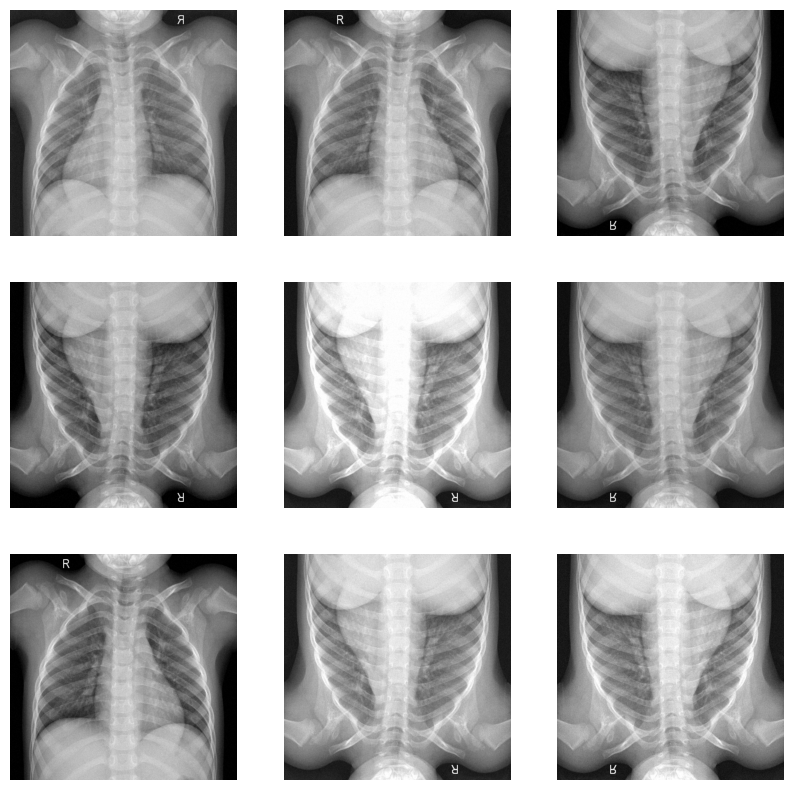

In [ ]:
import matplotlib.pyplot as plt

# Take one sample from the dataset multiple times to see different augmentations
subset = train_ds.take(1).repeat(9)  # Repeat 9 times to get different variations

# Plot augmented images
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(subset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')
    plt.axis('off')

plt.show()


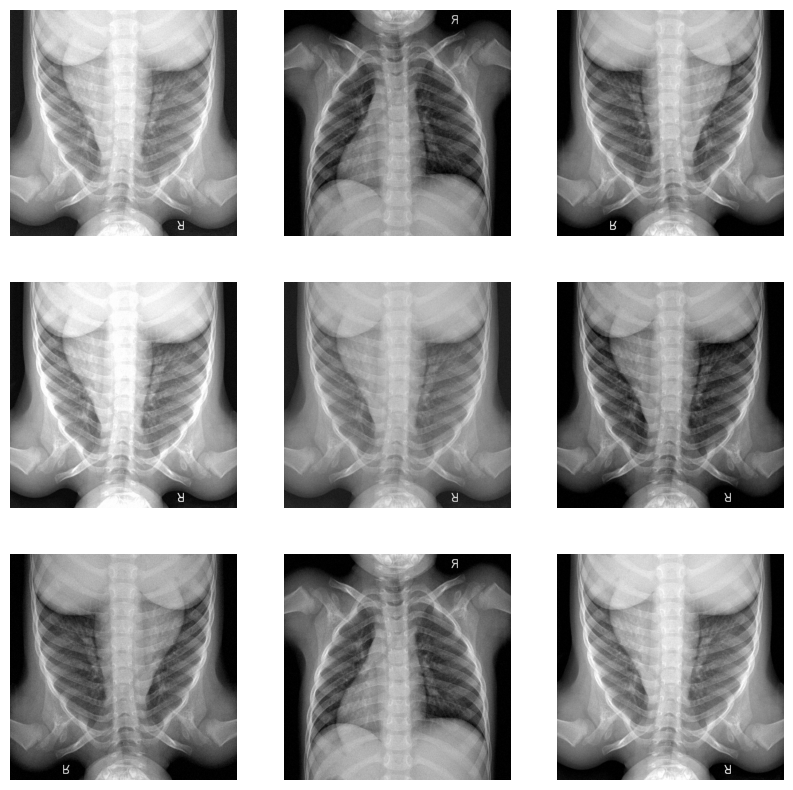

In [ ]:
subset = train_ds.take(1)
plt.figure(figsize=(10,10))
for i in range (9):
  image, label = next(iter(subset))
  ax = plt.subplot(3,3,i+1)
  plt.imshow(image.numpy().squeeze(),cmap='gray')
  plt.axis('off')
plt.show()

Explain the purpose of the chosen augmentation with an emphasis on the particular task.

# Prepare datasets for training
So far we defined datasets that can be used for training, but are not yet ready to process large amounts of data fast.

\\
We would like to make our dataset ready for fast batch processing.
The following function does that:
*   Cache your data - load it to your RAM/save it to file for faster access.
*   Shuffle your data.
*   Repeat the data - makes the iterator cyclic, so it will be repeated after each epoch, making an "infinite" dataset. This may be ommited, but the training process may differ.
*   Batch the data - fetch the data in batches, each batch has batch_size entries.
*   Prefetch the data - while you process one batch, the CPU will prefetch the next batches (including preprocessing and augmentations)


for further reading - https://www.tensorflow.org/guide/data


 **הכנת הדאטא לאימון**
* טעינה לזיכרון ראם
* ערבוב
* ביצוע לופים כדי להגיע ל"דאטא אינסופי"
* יצירת באטצ'ים
  * באטצ קטן - יותר תזזיתי, עוזר להברוח ממינימום לוקאלי,
  * באטצ גדול - חישוב נגזרות מסורבל יותר, יותר מדויק, פחות רועש
* טעינה מקדימה של הנתונים לאימון מהיר

In [ ]:
#Source https://www.tensorflow.org/tutorials/load_data/images#load_using_tfdata
def prepare_for_training(ds,batch_size=32, cache=True, shuffle_buffer_size=1000):
  # This is a small dataset, only load it once, and keep it in memory.
  # use `.cache(filename)` to cache preprocessing work for datasets that don't
  # fit in memory.
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  # Repeat forever
  ds = ds.repeat()

  ds = ds.batch(batch_size)

  # `prefetch` lets the dataset fetch batches in the background while the model
  # is training.
  ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

  return ds

In [ ]:
#Apply on your dataset
train_ds = prepare_for_training(train_ds, batch_size=32)  # Reduce from 32
val_ds = prepare_for_training(val_ds, batch_size=32)

Visualize results

In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n],cmap='gray')
      plt.title(label_to_finding[label_batch[n]])
      plt.axis('off')

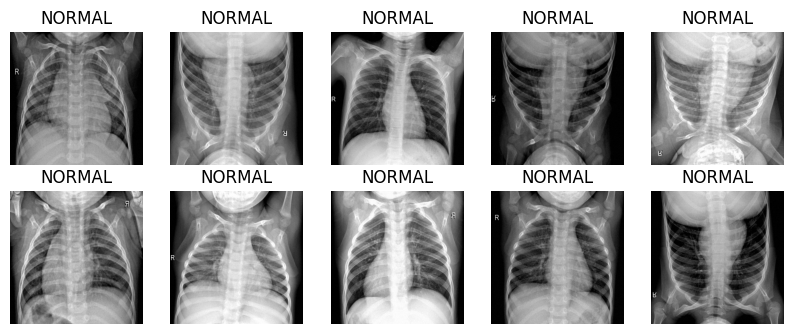

In [ ]:
image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy().squeeze(), label_batch.numpy())

# Choosing a Model

## Train a classification network

Now that you have a dataset ready, you are steps away from training your own classification network to help detect COVID-19 cases!


*   Build your CNN classification model and fit it.
*   Add data augmentations




עם L2 המודל לא למד
גם כששיחקתי עם הדרופאוט
לכן שיניתי לL1 כדי ליצור ענישה פחות חזקה

המודל לא למד כי הדיוק של האימון עלה והדיוק של הולידציה לא השתנה

בעיה שחוזרת - לוס של אימון מאוד קופצני גם בהגדלת הבאץ' סייז ל32
ניסיתי להפחית ארגומנטציה ודאופאוט וזה עזר ממש טיפה

דיוק מקסימלי שהגעתי אליו בולידשיון הוא 89 אחוז


In [ ]:
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (7,7), kernel_regularizer=l2(0.0001), input_shape=(512, 512, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (5,5), kernel_regularizer=l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (5,5), kernel_regularizer=l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (5,5), kernel_regularizer=l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model

import tensorflow as tf
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# הגדר EarlyStopping ו-ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=1e-6, verbose=1)


# הגדרת לוח זמנים עבור שיעור הלמידה (ניתן לשמור על CosineDecay או להחליף בהתאם)
from tensorflow.keras.optimizers.schedules import CosineDecay
initial_lr = 1e-5

lr_schedule = CosineDecay(initial_lr, decay_steps=2000, alpha=1e-6)


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, clipnorm=1.0)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Show Model Summary
model.summary()





Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 506, 506, 32)        │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 506, 506, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 506, 506, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 253, 253, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 249, 249, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 249, 249, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 249, 249, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 124, 124, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 120, 120, 128)       │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 120, 120, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 120, 120, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 56, 56, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 56, 56, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,7

 Total params: 1,146,755 (4.37 MB)

 Trainable params: 1,145,283 (4.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
import os
print(all(os.path.exists(path) for path in full_train_df["filepath"]))


True


In [ ]:
for img, label in train_ds.take(3):
    print("Image shape:", img.shape, "Label:", label.numpy())


Image shape: (32, 512, 512, 1) Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Image shape: (32, 512, 512, 1) Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Image shape: (32, 512, 512, 1) Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Plot your training process. valid/train loss. are you over/under fitted?

VALIDETION_STEPS = TEST_SIZE/BATCH SIZE

STEPS_PER_EPOCH = TRAIN_SIZE/BATCH_SIZE

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 102s 483ms/step - accuracy: 0.5343 - loss: 1.2568 - val_accuracy: 0.6100 - val_loss: 1.7557 - learning_rate: 1.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.5820 - loss: 1.1178 - val_accuracy: 0.0637 - val_loss: 2.0692 - learning_rate: 1.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.5864 - loss: 1.3270 - val_accuracy: 0.5925 - val_loss: 1.8104 - learning_rate: 1.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 411ms/step - accuracy: 0.5973 - loss: 1.1809 - val_accuracy: 0.6062 - val_loss: 1.9183 - learning_rate: 1.0000e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 410ms/step - accuracy: 0.6358 - loss: 1.0658 - val_accuracy: 0.6025 - val_loss: 1.2225 - learning_rate: 1.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 345ms/step - accuracy: 0.6214 - loss: 1.0797 - val_accuracy: 0.3700 - val_loss: 2.1180 - learning_rate: 1.0000e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 3

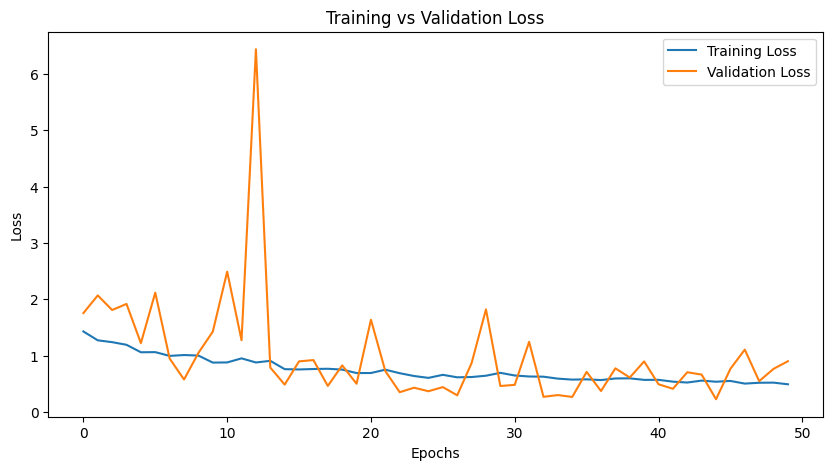

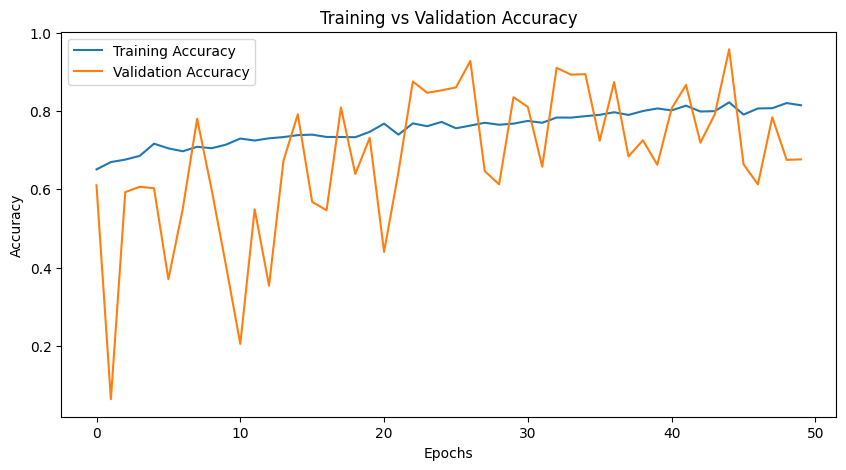

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import v2




history = model.fit(
    train_ds,
    class_weight=class_weights,
    validation_data=val_ds,
    epochs=50,
    steps_per_epoch=100,
    validation_steps=25,
    callbacks=[reduce_lr, early_stopping]
)


# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


For your classification task think about:
*  Are you overfitted? Why? What can you do?
*  Can the classes be distinguished?
*  What are the data limits? Can we filter/process it better?
*  Is it possible that we are classifying the X-Ray machine and not the case?

Evaluate your model using different measures:
* Confusion matrix
* Accuracy
* Precision
* Recall (Sensitivity)
* Specificity
* tsne

In [ ]:
# ודא שהמודל נבנה וקיבל מעבר עם dummy input
dummy_input = tf.zeros((1, 512, 512, 1))
_ = model(dummy_input)

# ניתן גם לוודא שהמודל בנוי
model.build(input_shape=(None, 512, 512, 1))
print("Model built. Input shape:", model.input_shape)

# שימוש בשכבת הקלט של המודל (השכבה הראשונה)
input_layer = model.layers[0].input

# נשתמש בשכבת 'global_average_pooling2d' לשם חילוץ המאפיינים
gap_layer_output = model.get_layer("global_average_pooling2d").output

feature_extractor = tf.keras.Model(inputs=input_layer, outputs=gap_layer_output)

# בדיקה: הפעלת feature_extractor עם קלט דמה
features = feature_extractor(dummy_input)
print("Extracted features shape:", features.shape)



NameError: name 'model' is not defined

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.manifold import TSNE

# =============================================================================
# 1. Get predictions and true labels from the validation dataset
# -----------------------------------------------------------------------------
# (Assuming 'val_ds' is a tf.data.Dataset that does NOT use .repeat() and has a known number of samples.)
# Also, 'validation_steps' is defined as the number of batches in your validation dataset.

y_true = []
y_pred = []

# Iterate over the validation dataset for a fixed number of steps:
for images, labels in val_ds.take(25):
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# =============================================================================
# 2. Confusion Matrix
# -----------------------------------------------------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# =============================================================================
# 3. Accuracy, Precision, and Recall (Sensitivity)
# -----------------------------------------------------------------------------
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # 'weighted' averages per-class scores based on support
recall = recall_score(y_true, y_pred, average='weighted')        # Recall is equivalent to sensitivity

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")

# =============================================================================
# 4. Specificity (per class)
# -----------------------------------------------------------------------------
# Specificity = TN / (TN + FP) for each class.
# We compute it for each class from the confusion matrix.

num_classes = cm.shape[0]
specificities = []

for i in range(num_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    spec = TN / (TN + FP) if (TN + FP) > 0 else 0
    specificities.append(spec)
    print(f"Specificity for class {i}: {spec:.4f}")

# =============================================================================
# 5. t-SNE Visualization of Learned Features
# -----------------------------------------------------------------------------
# To visualize the embedding space, we extract features from an intermediate layer.
# For example, if your model's penultimate layer (before the final Dense) is a 256-unit Dense layer,
# you can create a feature extractor model.

# Adjust the index or layer name as per your model architecture.
#feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.layers[-3].output)

features = []
labels_list = []

for images, labels in val_ds.take(25):
    feat = feature_extractor.predict(images)
    features.append(feat)
    labels_list.extend(labels.numpy())

features = np.concatenate(features, axis=0)
labels_array = np.array(labels_list)

# Run t-SNE on the extracted features
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=labels_array, palette='deep', legend='full')
plt.title("t-SNE Visualization of Feature Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


KeyboardInterrupt: 

In [ ]:
def test_time_augmentation(model, image):
    preds = []
    for _ in range(5):  # Augment 5 times
        augmented_img = tf.image.random_flip_left_right(image)
        augmented_img = tf.image.random_flip_up_down(augmented_img)
        augmented_img = tf.image.resize(augmented_img, [512, 512])
        preds.append(model.predict(tf.expand_dims(augmented_img, axis=0)))
    return np.mean(preds, axis=0)

# Run TTA on Sample Image
sample_image, sample_label = next(iter(val_ds.take(1)))
tta_prediction = test_time_augmentation(model, sample_image[0])
print("TTA Prediction:", tta_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
TTA Prediction: [[2.127856e-04 9.675247e-01 3.226256e-02]]


**Answer the questions above here**

...

...

...


In [ ]:
#Study the results and try to acheive best classification accuracy

## Transfer learning

transfer learning (https://www.tensorflow.org/tutorials/images/transfer_learning)

Load the pre trained ResNet-50 model and fine tune it to your data. (https://www.tensorflow.org/api_docs/python/tf/keras/applications)



<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<ipython-input-59-f221dd7649ce>:7: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  base_model = tf.keras.applications.ResNet-50(


AttributeError: module 'keras.api.applications' has no attribute 'ResNet'

In [ ]:
### prepare it for training- freeze the resnet layers and add a classification head
 ### Fill in your code




def preprocess_grayscale(img, label):
    img = tf.image.grayscale_to_rgb(img)  # Converts (512, 512, 1) → (512, 512, 3)
    return img, label

train_ds = train_ds.map(preprocess_grayscale)
val_ds = val_ds.map(preprocess_grayscale)






In [ ]:
  ### trian the model:
   ### Fill in your code

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2

# Load MobileNetV2 with correct input size
base_model = MobileNetV2(
    input_shape=(224, 224, 3),  # Correct input shape for pretrained weights
    include_top=False,
    weights='imagenet'
)

# Freeze pre-trained layers
base_model.trainable = False

# Define the full model with preprocessing
model = tf.keras.Sequential([
    tf.keras.layers.Resizing(224, 224),  # Resize X-ray images
    tf.keras.layers.Lambda(lambda x: x if x.shape[-1] == 3 else tf.image.grayscale_to_rgb(x)),  # Only convert if grayscale
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Display model summary
model.summary()



9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ ?                           │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
def one_hot_encode(label):
    return tf.one_hot(label, depth=3)  # Convert to 3-class one-hot encoding

train_ds = train_ds.map(lambda img, label: (img, one_hot_encode(label)))
val_ds = val_ds.map(lambda img, label: (img, one_hot_encode(label)))


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.4214 - loss: 1.9909 - val_accuracy: 0.5688 - val_loss: 1.3217
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - accuracy: 0.5095 - loss: 1.8242 - val_accuracy: 0.8875 - val_loss: 1.0023
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 174ms/step - accuracy: 0.5953 - loss: 1.6473 - val_accuracy: 0.8984 - val_loss: 0.9411
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.6295 - loss: 1.5145 - val_accuracy: 0.9203 - val_loss: 0.8680
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.6079 - loss: 1.5177 - val_accuracy: 0.9203 - val_loss: 0.8726
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.6608 - loss: 1.3990 - val_accuracy: 0.9203 - val_loss: 0.8986
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - accuracy: 0.6497 - loss: 1.4143 - val_accuracy: 0.8844 - val_loss: 0.9844
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - accuracy: 0.7325 - loss: 1.2738 - val_accur

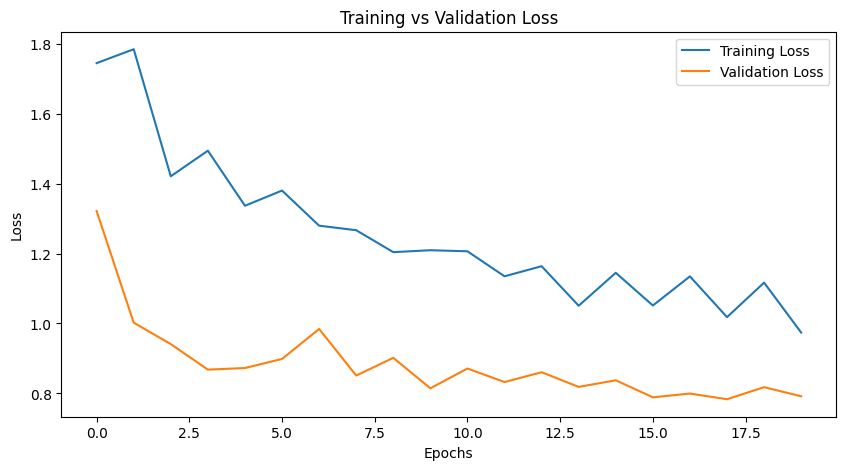

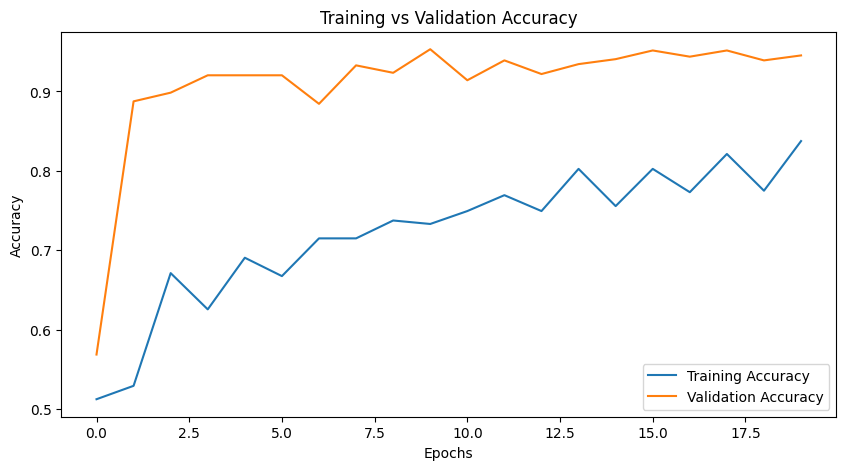

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    steps_per_epoch=50,
    validation_steps=20
)



# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()


Evaluate your results and compare them to your own CNN model.

Model built. Input shape: (None, 512, 512, 3)


ValueError: No such layer: global_average_pooling2d. Existing layers are: ['resizing', 'lambda', 'mobilenetv2_1.00_224', 'global_average_pooling2d_1', 'dense_2', 'batch_normalization_5', 'dropout_2', 'dense_3'].

# Test Time Augmentation

Similar to what Data Augmentation is doing to the training set, the purpose of Test Time Augmentation is to perform random modifications to the test images. Thus, instead of showing the regular, “clean” images, only once to the trained model, we will show it the augmented images several times. We will then average the predictions of each corresponding image and take that as our final guess.

## Use Test Time Augmentation
Using your choise of augmentations write your own code for test time augmentation

In [ ]:
  ### Fill in your code

## Compare your test results with those of the previous sections   

In [ ]:
  ### Fill in your code